# Breast Cancer Detection Project Phase-2

!pip install -q kaggle
!pip install kaggle --upgrade
!pip install pandas
!pip install opendatasets
!pip install matplotlib

In [ ]:
#Download breakhis dataset from kaggle

import pandas as pd
import opendatasets as od
od.download('https://www.kaggle.com/datasets/ambarish/breakhis/')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aflah3100
Your Kaggle Key: ········


100%|██████████████████████████████████████| 3.99G/3.99G [03:54<00:00, 18.2MB/s]


In [10]:
#Total number of images in breakhis dataset
import os

dataset_path = '/home/aflah/Desktop/Project-Phase-2/breakhis'
img_count=0


for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.png') or file.endswith('.jpg'): 
            img_count+=1
print("Total number of images: "+str(img_count))


Total number of images: 7909


In [11]:
#Shape of an image in breakhis dataset
import cv2
x = cv2.imread("/home/aflah/Desktop/Project-Phase-2/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png")
print(x.shape)


(460, 700, 3)


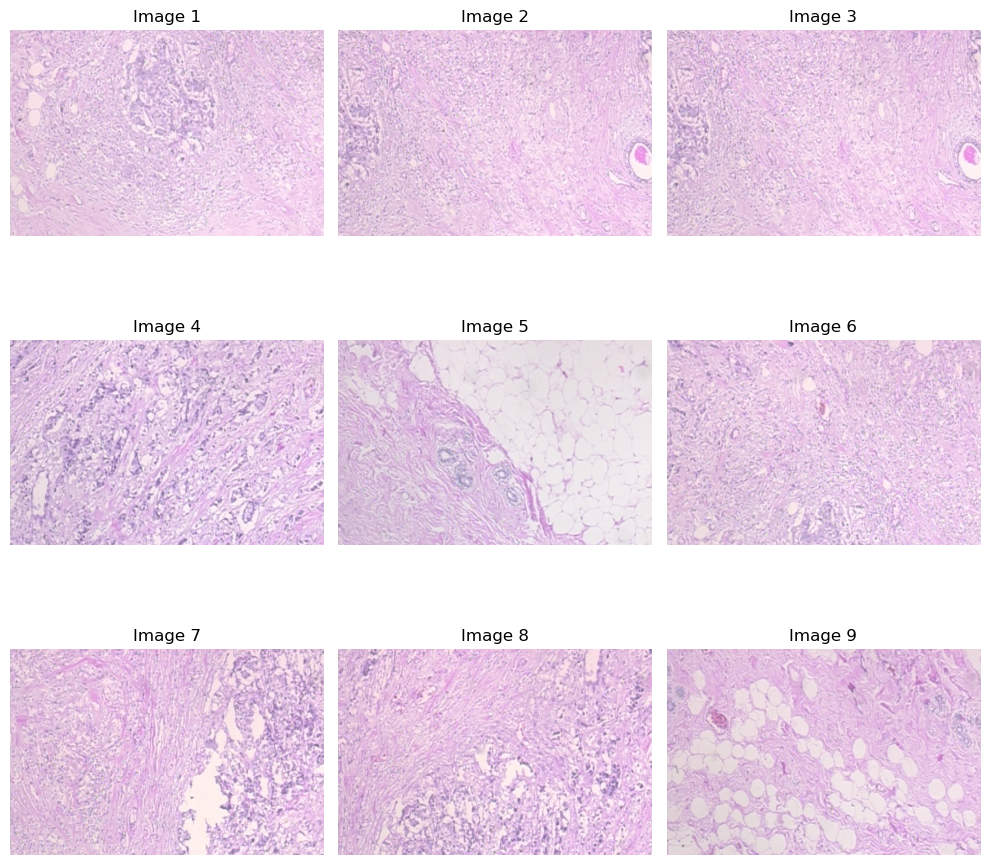

In [12]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


dataset_path = '/home/aflah/Desktop/Project-Phase-2/breakhis'


image_paths = []


for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.png') or file.endswith('.jpg'):  
            image_path = os.path.join(root, file)
            image_paths.append(image_path)


num_images_to_display = 9

plt.figure(figsize=(10, 10))

for i in range(num_images_to_display):
    plt.subplot(3, 3, i + 1)
    img = mpimg.imread(image_paths[i])
    plt.imshow(img)
    plt.axis('off')  
    plt.title(f"Image {i+1}")

plt.tight_layout()
plt.show()


### Extracting 400X Images of Benign Category

In [14]:
import os
import shutil


benign_path = "/home/aflah/Desktop/Project-Phase-2/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB"


combined_benign_path = "/home/aflah/Desktop/Project-Phase-2/combined_bengign_400X"

os.makedirs(combined_benign_path, exist_ok=True)


for sob_folder in os.listdir(benign_path):
    sob_path = os.path.join(benign_path, sob_folder)
    if os.path.isdir(sob_path):
        
        sob_output_path = os.path.join(combined_benign_path, sob_folder)
        os.makedirs(sob_output_path, exist_ok=True)
       
        for class_folder in os.listdir(sob_path):
            class_path = os.path.join(sob_path, class_folder)
            if os.path.isdir(class_path):
               
                class_name = f"{class_folder}_400x"
                class_output_path = os.path.join(sob_output_path, class_name)
                os.makedirs(class_output_path, exist_ok=True)
                
                image_path_400x = os.path.join(class_path, "400X")
                if os.path.isdir(image_path_400x):
                    # Copy images to the new folder
                    for image_file in os.listdir(image_path_400x):
                        image_src = os.path.join(image_path_400x, image_file)
                        image_dst = os.path.join(class_output_path, image_file)
                        shutil.copy(image_src, image_dst)

print("Extraction completed successfully.")


Extraction completed successfully.


### Extracting 400x Images of Malignant Category

In [16]:
import os
import shutil


benign_path = "/home/aflah/Desktop/Project-Phase-2/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB"


combined_benign_path = "/home/aflah/Desktop/Project-Phase-2/combined_malignant_400X"

os.makedirs(combined_benign_path, exist_ok=True)


for sob_folder in os.listdir(benign_path):
    sob_path = os.path.join(benign_path, sob_folder)
    if os.path.isdir(sob_path):
        
        sob_output_path = os.path.join(combined_benign_path, sob_folder)
        os.makedirs(sob_output_path, exist_ok=True)
       
        for class_folder in os.listdir(sob_path):
            class_path = os.path.join(sob_path, class_folder)
            if os.path.isdir(class_path):
               
                class_name = f"{class_folder}_400x"
                class_output_path = os.path.join(sob_output_path, class_name)
                os.makedirs(class_output_path, exist_ok=True)
                
                image_path_400x = os.path.join(class_path, "400X")
                if os.path.isdir(image_path_400x):
                    # Copy images to the new folder
                    for image_file in os.listdir(image_path_400x):
                        image_src = os.path.join(image_path_400x, image_file)
                        image_dst = os.path.join(class_output_path, image_file)
                        shutil.copy(image_src, image_dst)

print("Extraction completed successfully.")


Extraction completed successfully.


### Creating Benign Images of 400X resolution

In [17]:
import os
import shutil


source_directory = "/home/aflah/Desktop/Project-Phase-2/combined_bengign_400X"


destination_directory = "/home/aflah/Desktop/Project-Phase-2/benign_400X_images"


os.makedirs(destination_directory, exist_ok=True)


for root, dirs, files in os.walk(source_directory):
    for file in files:
        
        file_path = os.path.join(root, file)
        
        shutil.move(file_path, destination_directory)

print("All images moved successfully.")


All images moved successfully.


### Creating Malignant Images of 400X Resolution

In [18]:
import os
import shutil


source_directory = "/home/aflah/Desktop/Project-Phase-2/combined_malignant_400X"


destination_directory = "/home/aflah/Desktop/Project-Phase-2/malignant_400X_images"


os.makedirs(destination_directory, exist_ok=True)


for root, dirs, files in os.walk(source_directory):
    for file in files:
        
        file_path = os.path.join(root, file)
        
        shutil.move(file_path, destination_directory)

print("All images moved successfully.")


All images moved successfully.


### Resizing benign and malignant into 3 resolutions

In [24]:
import os
import cv2

# Function to resize images in a folder to different resolutions
def resize_images(input_folder, output_folder, resolutions):
    # Process each resolution
    for resolution in resolutions:
        # Create subfolder for the current resolution
        resolution_folder = os.path.join(output_folder, str(resolution))
        os.makedirs(resolution_folder, exist_ok=True)

        # List all files in the input folder
        files = os.listdir(input_folder)

        # Process each image file
        for file in files:
            # Load the image
            image_path = os.path.join(input_folder, file)
            image = cv2.imread(image_path)

            # Resize image to the current resolution
            resized_image = cv2.resize(image, (resolution, resolution))

            # Save the resized image to the resolution folder
            output_path = os.path.join(resolution_folder, file)
            cv2.imwrite(output_path, resized_image)

# Input and output folders
input_folder_1 = "/home/aflah/Desktop/Project-Phase-2/benign_400X_images"
output_folder_1 = "/home/aflah/Desktop/Project-Phase-2/benign_400X_resized"
input_folder_2 = "/home/aflah/Desktop/Project-Phase-2/malignant_400X_images"
output_folder_2 = "/home/aflah/Desktop/Project-Phase-2/malignant_400X_resized"

# Resolutions for resizing
resolutions = [100, 224, 400]

# Resize images
resize_images(input_folder_1, output_folder_1, resolutions)
resize_images(input_folder_2, output_folder_2, resolutions)

### Merging Resized Images

In [25]:
import os
import shutil

# Source directories
benign_source_dir = "/home/aflah/Desktop/Project-Phase-2/benign_400X_resized"
malignant_source_dir = "/home/aflah/Desktop/Project-Phase-2/malignant_400X_resized"

# Destination directory
destination_dir = "/home/aflah/Desktop/Project-Phase-2/Train_Images"

# Target resolutions
resolutions = [100, 224, 400]

# Function to merge images from source directories for a specific resolution
def merge_images(source_dir_1, source_dir_2, destination_dir, resolution):
    # Create resolution directory in the destination directory
    resolution_dir = os.path.join(destination_dir, str(resolution))
    os.makedirs(resolution_dir, exist_ok=True)

    # Iterate through both source directories
    for source_dir in [source_dir_1, source_dir_2]:
        # Get the directory for the current resolution
        source_resolution_dir = os.path.join(source_dir, str(resolution))

        # Copy images from the current resolution directory to the destination directory
        for file in os.listdir(source_resolution_dir):
            shutil.copy(os.path.join(source_resolution_dir, file), resolution_dir)

# Merge images for each resolution
for resolution in resolutions:
    merge_images(benign_source_dir, malignant_source_dir, destination_dir, resolution)


# Building MRCAE Architecture

### Creating Convolutional Auto Encoders

In [1]:
#Importing Libraries
import numpy as np
import os
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from keras.models import save_model, load_model


2024-03-08 12:09:07.345823: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-08 12:09:07.362493: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-08 12:09:07.449056: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-08 12:09:07.449690: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-08 12:09:07.929606: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
#Preprocessing Target Images 
def load_and_preprocess_images(data_path, target_resolution):
    images = []
    for filename in os.listdir(data_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  
            image_path = os.path.join(data_path, filename)
            img = load_img(image_path, target_size=(target_resolution, target_resolution), color_mode='grayscale')
            img_array = img_to_array(img) / 255.0  # Normalize pixel values
            images.append(img_array)
    return np.array(images)

In [3]:
low_res_data_path = "/home/aflah/Desktop/Project-Phase-2/Train_Images/100"
mid_res_data_path = "/home/aflah/Desktop/Project-Phase-2/Train_Images/224"
high_res_data_path = "/home/aflah/Desktop/Project-Phase-2/Train_Images/400"

# Load and preprocess low-resolution images
low_res_data = load_and_preprocess_images(low_res_data_path, target_resolution=100)

# Load and preprocess mid-resolution images
mid_res_data = load_and_preprocess_images(mid_res_data_path, target_resolution=224)

# Load and preprocess high-resolution images
high_res_data = load_and_preprocess_images(high_res_data_path, target_resolution=400)

### Creating Convolutional Auto-Encoder

In [4]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

def create_flexible_autoencoder():
    input_img = Input(shape=(None, None, 1))  # Flexible input shape
    
    # Encoder
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)
    
    # Decoder
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    return autoencoder


### Trainging Auto Encoders

In [5]:
from keras.callbacks import LambdaCallback

def train_autoencoder(autoencoder, data, epochs=5, batch_size=32):
    autoencoder.fit(data, data, epochs=epochs, batch_size=batch_size)

autoencoder1 = create_flexible_autoencoder()
autoencoder2 = create_flexible_autoencoder()
autoencoder3 = create_flexible_autoencoder()


train_autoencoder(autoencoder1, low_res_data)
autoencoder2.set_weights(autoencoder1.get_weights())

train_autoencoder(autoencoder2, mid_res_data)
autoencoder3.set_weights(autoencoder2.get_weights())

train_autoencoder(autoencoder3, high_res_data)



2024-03-08 12:09:19.297962: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/5
57/57 [==============================] - 50s 869ms/step - loss: 0.0275
Epoch 2/5
57/57 [==============================] - 53s 930ms/step - loss: 0.0096
Epoch 3/5
57/57 [==============================] - 55s 957ms/step - loss: 0.0049
Epoch 4/5
57/57 [==============================] - 55s 961ms/step - loss: 0.0035
Epoch 5/5
57/57 [==============================] - 55s 957ms/step - loss: 0.0029
Epoch 1/5
57/57 [==============================] - 356s 6s/step - loss: 0.0079
Epoch 2/5
57/57 [==============================] - 440s 8s/step - loss: 8.3590e-04
Epoch 3/5
57/57 [==============================] - 507s 9s/step - loss: 7.6313e-04
Epoch 4/5
57/57 [==============================] - 558s 10s/step - loss: 7.3215e-04
Epoch 5/5
57/57 [==============================] - 526s 9s/step - loss: 6.4828e-04
Epoch 1/5
57/57 [==============================] - 1768s 31s/step - loss: 0.0080
Epoch 2/5
57/57 [==============================] - 1443s 25s/step - loss: 4.0597e-04
Epoch 3/5
57/57 [

In [7]:
save_model(autoencoder3, 'final_autoencoder.h5')

### Testing the trained Model

In [8]:
Final_AutoEncoder = load_model('final_autoencoder.h5')

1/1 [==============================] - 1s 658ms/step


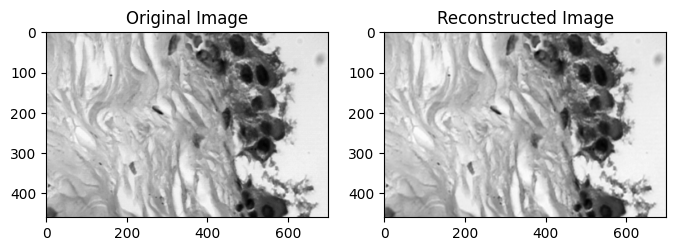

Mean Squared Error (MSE): 6.882278636184063e-05


In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def preprocess_single_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) / 255.0
    return np.expand_dims(img, axis=(0, -1))

def save_image(image, path):
    plt.imshow(image.squeeze(), cmap='gray')
    plt.axis('off')
    plt.savefig(path, bbox_inches='tight', pad_inches=0)
    plt.close()

def visualize_images(original, reconstructed):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original.squeeze(), cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed.squeeze(), cmap='gray')
    plt.title('Reconstructed Image')
    plt.show()

test_image_path = "SOB_B_A-14-22549AB-400-001.png"

# Preprocess the image
test_image_mrcae = preprocess_single_image(test_image_path)

# Predict using the flexible autoencoder
reconstructed_image_mrcae = Final_AutoEncoder.predict(test_image_mrcae)

# Save and visualize the original and reconstructed images
save_image(test_image_mrcae, 'original_image_mrcae.png')
save_image(reconstructed_image_mrcae, 'reconstructed_image_mrcae.png')
visualize_images(test_image_mrcae, reconstructed_image_mrcae)

# Calculate and display the Mean Squared Error (MSE)
mse = np.mean(np.square(test_image_mrcae - reconstructed_image_mrcae))
print(f'Mean Squared Error (MSE): {mse}')
